# Восстановление золота из руды

## Подготовка данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

from sklearn. metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score

from IPython.core.display import display, HTML

In [3]:
STATE = 12345

In [4]:
display(HTML("<style>.container { width:70% !important; }</style>"))

In [5]:
data = pd.read_csv('/datasets/gold_industry_full.csv')
data_train = pd.read_csv('/datasets/gold_industry_train.csv')
data_test = pd.read_csv('/datasets/gold_industry_test.csv')

In [6]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

### Знакомство с данными. Обработка дубликатов и пропусков.

In [7]:
data

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

In [8]:
data_train.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

In [9]:
data_test.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,1147.248241,-500.363165,1047.279065,-500.354091,948.756608,-498.439416,849.441918,-499.255503,850.112246,-499.407112,6.168939,9.309852,95.248427,8.078957,6.500000,1.283045,1648.759906,-399.862053,1650.135395,-399.957321,1648.831890,-400.586116,1649.464582,-400.673303,34.940919,-500.150510,30.031867,-500.328335,26.033990,-500.147792,22.952306,-500.037678,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,1154.087804,-500.036580,1054.009756,-500.237335,944.138793,-496.866953,851.589767,-499.040466,851.345606,-499.122561,6.209517,9.297194,98.880538,7.984164,6.500000,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,1651.498591,-399.745329,34.980742,-498.131002,29.968453,-586.013330,25.971737,-499.608392,22.958448,-499.821308,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,-300.124116,1150.754676,-499.986009,1049.182824,-500.014696,948.085464,-499.997003,850.170086,-500.270334,849.557905,-500.198702,7.358308,9.000624,119.497545,8.003752,6.500000,1.259741,1647.368779,-399.788506,1648.395206,-400.166490,1648.953828,-400.468641,1649.821569,-400.071884,34.952967,-501.204647,29.927025,-500.106628,25.978253,-499.890060,23.004376,-500.014529,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,-299.778385,1152.512559,-500.338106,1052.601592,-499.695075,955.171539,-500.294989,851.957342,-499.779541,850.765662,-501.030559,6.929364,8.920717,108.080163,7.970121,6.660000,0.774909,1652.660845,-399.702218,1651.203128,-400.291472,1651.924848,

In [10]:
for df in [data, data_train, data_test]:
    print('='*60)
    print(f'- Всего строк: {df.shape[0]}. \n- Всего столбцов: {df.shape[1]}')
    print(f'- Строк с пропусками: {len(df)-len(df.dropna())} ({((len(df)-len(df.dropna()))/len(df)):.1%})')
    print('- Кол-во строк-дубликатов: ',df.duplicated().sum())
    print('='*16, '↓↓ Информацио о фрейме: ↓↓', '='*16)
    df.info()
    print()

- Всего строк: 19439. 
- Всего столбцов: 87
- Строк с пропусками: 3345 (17.2%)
- Кол-во строк-дубликатов:  0
================ ↓↓ Информацио о фрейме: ↓↓ ================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  

Посмотрим в каких стобцах встречаются пропуски.

In [11]:
pd.set_option('display.max_rows', None)
data.isna().any(axis=0)
pd.set_option('display.max_rows', 50)

Столбец date следовало бы привести к подходящему типу datetime, но в нашем случае нет необходимости в этом, так в данном виде он отлично сортируется и в строковом типе. Для создания модели он использоваться не будет.<br>
Дуликатов нет.<br> Пропусков достаточно много (более 15% в тренировочной выборке и 6% в тестовой) и они затронули большую часть столбцов. 
Известно, что соседние по времени параметры часто похожи, поэтому заполним пропуски в тренировочной и тестовой выборках, используя предыдущие занчения.

In [12]:
data_train.sort_values(by='date', inplace=True)
data_train.ffill(axis=0, inplace=True)
print('Пропусков в тренировочной: ', len(data_train) - len(data_train.dropna()))
data_test.sort_values(by='date', inplace=True)
data_test.ffill(axis=0, inplace=True)
print('Пропусков в тестовой: ', len(data_test) - len(data_test.dropna()))

Пропусков в тренировочной:  0
Пропусков в тестовой:  0


### Расчёт эффективности обогащения

Посчитаем recovery по заданной формуле для обучающей выборки data_train и расчет MAE
<table align=left><tr align=left>
    <td><img src='https://pictures.s3.yandex.net/resources/Recovery_1576238822.jpg' width='700'></td>
    <td><div align=left><font size=3>
        <ul><li>C — доля золота в концентрате после флотации/очистки</left></li>
            <li>F — доля золота в сырье/концентрате до флотации/очистки</li>
            <li>T — доля золота в отвальных хвостах после флотации/очистки.</li>
        </ul></font>
    </td>
    </tr>
</table>

In [13]:
recovery = (data_train['rougher.output.concentrate_au']*
           (data_train['rougher.input.feed_au'] - data_train['rougher.output.tail_au'])/ 
           (data_train['rougher.input.feed_au']*
           (data_train['rougher.output.concentrate_au'] - data_train['rougher.output.tail_au']))*100)
mean_absolute_error(data_train['rougher.output.recovery'], recovery)

9.83758577644259e-15

Значения отличаются на триллионные доли процентов. Столь малой разницей можно принебрегать.

Как можно заметить выше в таблице отсутствует доля золота в концентрате после второй очистки. Эти значения можно при необходимости восстановить по значению столбца final.output.recovery

### Проанализируем недостающие в тестовой столбцы и причины отсутствия.

In [14]:
set(data_train.columns) - set(data_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Как видно все столбцы относятся к параметру output и calculation, что относится к результатам, полученным после проведения этапов очистки.

## Анализ данных

### Посмотрим как менялась эффективность обогащения в зависимости от года

In [15]:
(data
    .assign(year = pd.to_datetime(data['date']).dt.year)
    .pivot_table(index='year',
                 values=['final.output.recovery','rougher.output.recovery'],
                 aggfunc=['mean','median']))

mean                                        median  \
     final.output.recovery rougher.output.recovery final.output.recovery   
year                                                                       
2016             66.141241               81.308685             67.452059   
2017             67.714944               84.114640             69.027984   
2018             67.388241               85.304181             68.233156   

                              
     rougher.output.recovery  
year                          
2016               84.607724  
2017               87.802820  
2018               86.407238

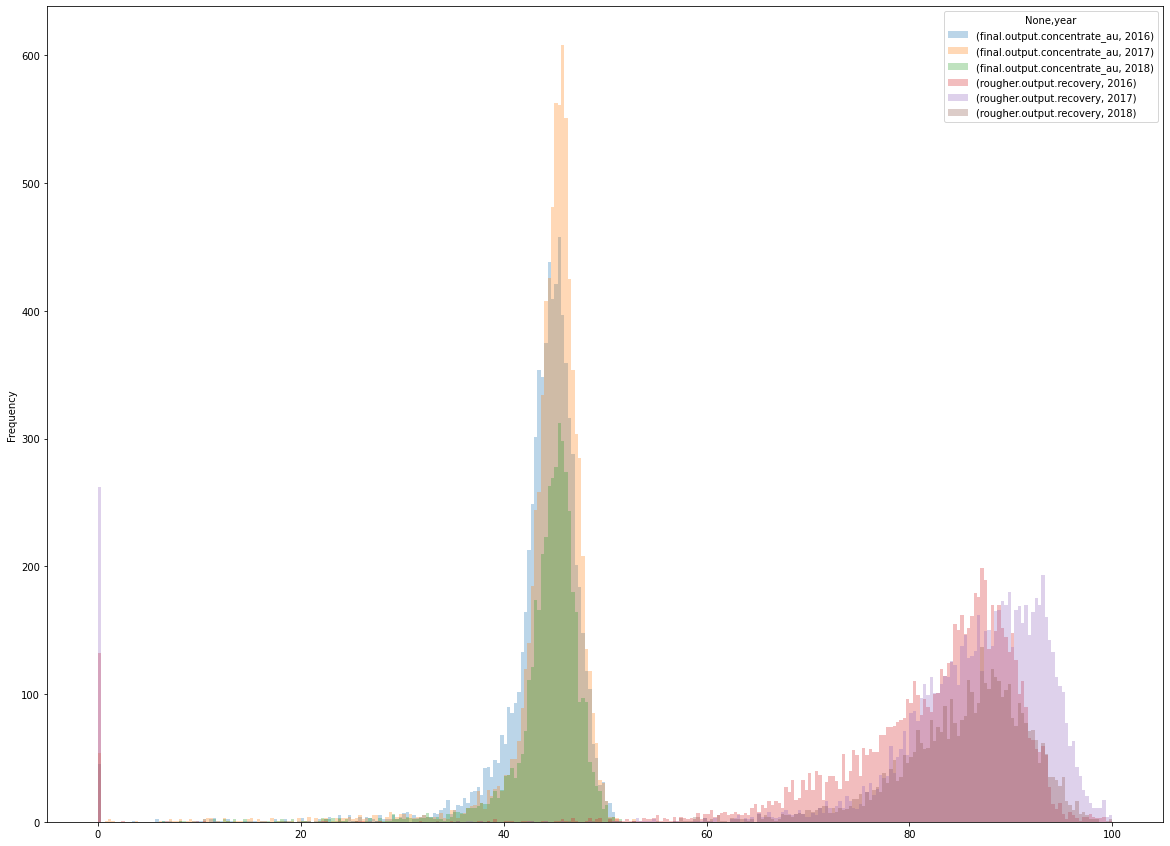

In [16]:
(data
    .assign(year = pd.to_datetime(data['date']).dt.year)
    .pivot_table(index='date',
                 columns='year',
                 values=['rougher.output.recovery',
                         'final.output.concentrate_au'],
                 aggfunc='first')
    .plot(kind='hist',
          alpha=0.3,
          bins=300,
          figsize=(20,15)));

Однозначный вывод об изменении эффективности обогащения во времени сделать нельзя.

### Построим графики изменения концентрации веществ для золота

Построим график зависимости концентрации золота, серебра и свинца после очистки от содержания в неочищенной смеси. 

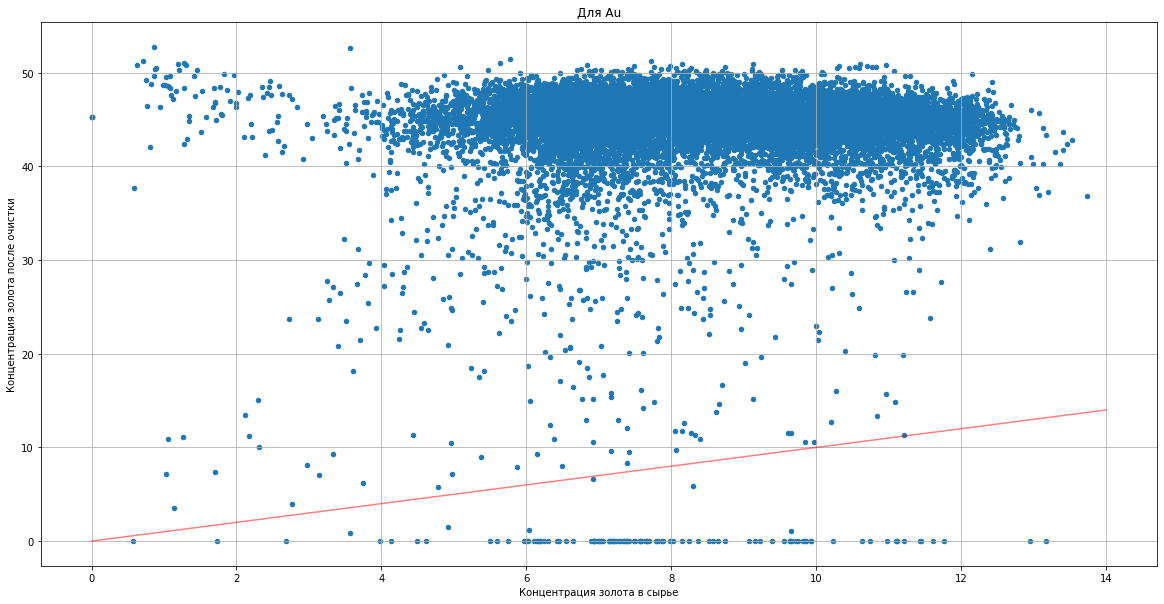

In [17]:
data_train.plot(x='rougher.input.feed_au',
                y='final.output.concentrate_au',
                kind='scatter',
                title='Для Au',
                grid=True,
                figsize=(20,10));
plt.xlabel("Концентрация золота в сырье")
plt.ylabel("Концентрация золота после очистки")
plt.plot([0, 14], [0, 14], ls="-", c='red', alpha=0.5)
plt.show()

Наблюдаются аномальные значения, при которых начальная концентрация выше и нулевая после очистки.<br> 
Найдём возможные аномалии, когда концентрация золота после очистки меньше начального или промежуточного и уж тем более не нулевая.

In [18]:
def ano_search (df, final_raw, raw_list): #поиск аномалий
    count = 1
    total = 0
    for raw in raw_list:
        tmp = (df[df[raw] > df[final_raw]].shape[0])
        print (f'На этапе {count} обнаружено {tmp} аномалий!')
        count += 1
        total += tmp
    print(f'Всего аномалий обнаружено: {total}')

In [19]:
def ano_cut (df, final_raw, raw_list): # удаление аномалий
    total_raws = df.shape[0]
    for raw in raw_list:
        df = df[df[raw] < df[final_raw]]
    print (f'Всего строк удалено: {total_raws - df.shape[0]}')    
    return df

In [20]:
raw_list_au = ['rougher.input.feed_au', 
               'rougher.output.concentrate_au', 
               'primary_cleaner.output.concentrate_au', 
               'final.output.concentrate_au']
raw_list_ag = ['rougher.input.feed_ag', 
               'rougher.output.concentrate_ag', 
               'primary_cleaner.output.concentrate_ag', 
               'final.output.concentrate_ag']
raw_list_pb = ['rougher.input.feed_pb', 
               'rougher.output.concentrate_pb', 
               'primary_cleaner.output.concentrate_pb', 
               'final.output.concentrate_pb']

In [21]:
ano_search(data_train, raw_list_au[-1], raw_list_au[:-1])

На этапе 1 обнаружено 105 аномалий!
На этапе 2 обнаружено 161 аномалий!
На этапе 3 обнаружено 276 аномалий!
Всего аномалий обнаружено: 542


Аномалий не так и много относительно общего количества строк. Избавимся от них.

In [22]:
data_train = ano_cut(data_train, raw_list_au[-1], raw_list_au[:-1])

Всего строк удалено: 284


### Построим диаграммы распределения для Au, Ag, Pb.

In [23]:
stage_columns = []
stage = ['Сырье','Черновой концентрат','После первой очистки','Финальный концентрат']
stage_columns.append(['rougher.input.feed_au',
                   'rougher.input.feed_ag',
                   'rougher.input.feed_pb'])
stage_columns.append(['rougher.output.concentrate_au',
                   'rougher.output.concentrate_ag',
                   'rougher.output.concentrate_pb'])
stage_columns.append(['primary_cleaner.output.concentrate_au',
                   'primary_cleaner.output.concentrate_ag',
                   'primary_cleaner.output.concentrate_pb'])
stage_columns.append(['final.output.concentrate_au',
                   'final.output.concentrate_ag',
                   'final.output.concentrate_pb'])

In [24]:
def hist_fun_1 (df, name=''):
    title1 = 'Диаграмма размаха значений концентрации '+ name + ' на разных этапах очистки'
    title2 = 'Гистограмма распределения значений концентрации '+ name + ' на разных этапах очистки'
    df.columns = stage
    df.plot(kind='box', 
                       figsize=(20,10),
                       vert=False,
                       rot=80,
                       title=title1);
    df.plot(kind='hist',
                title=title2,
                figsize=(20,10),
                bins=300,
                grid=True,
                alpha=0.5);
    plt.xlabel('Концентрация')
    plt.ylabel("Количество значений");
    plt.show()

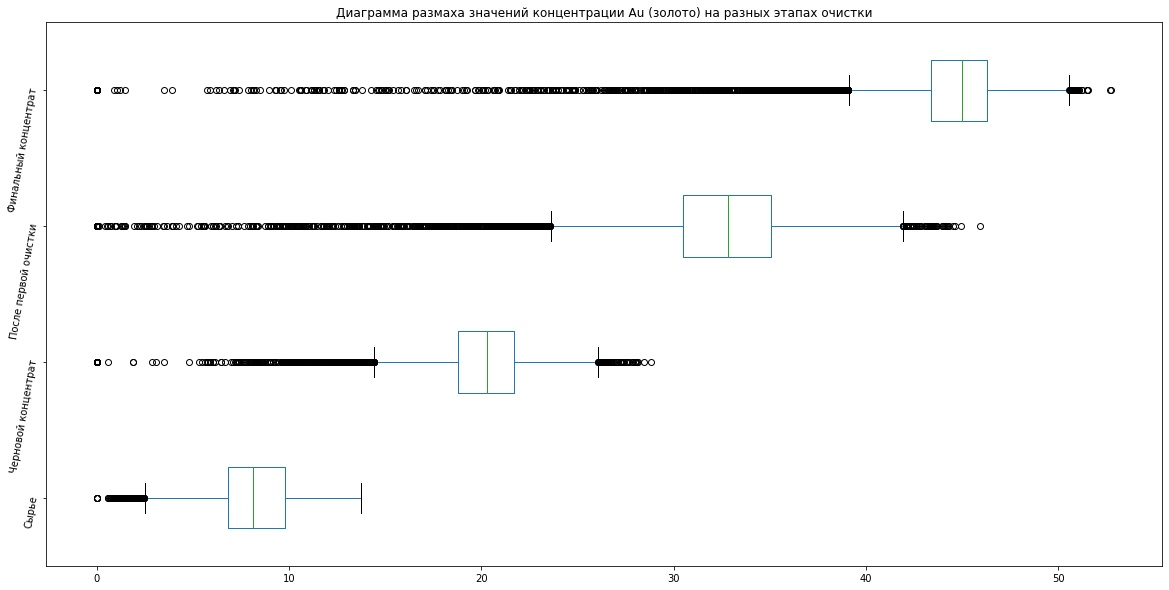

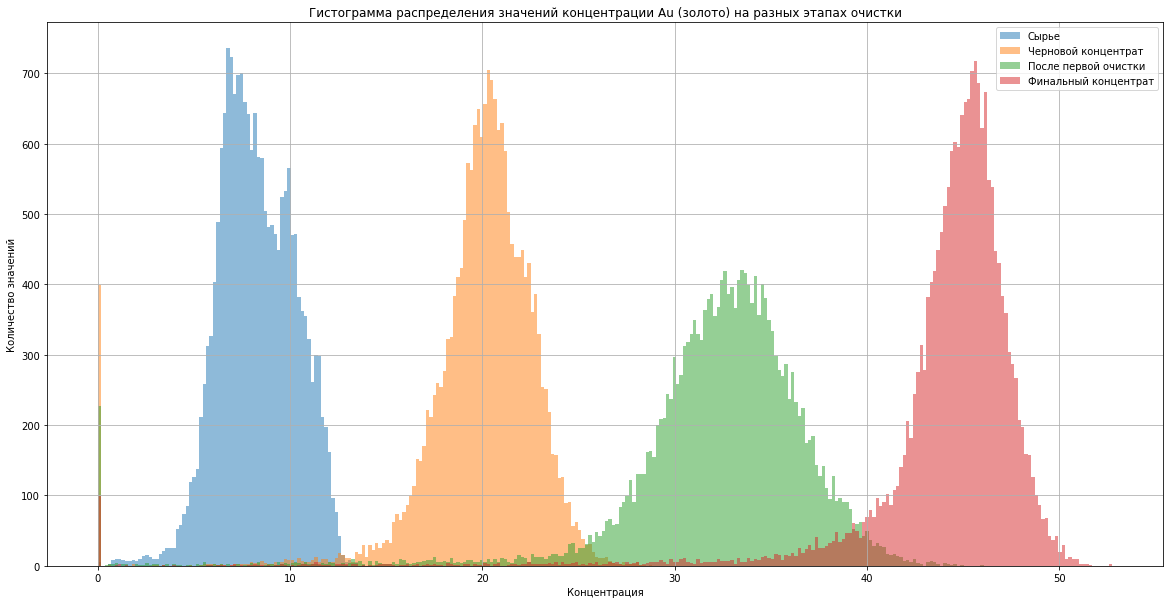

In [25]:
hist_fun_1 (data[raw_list_au], 'Au (золото)')

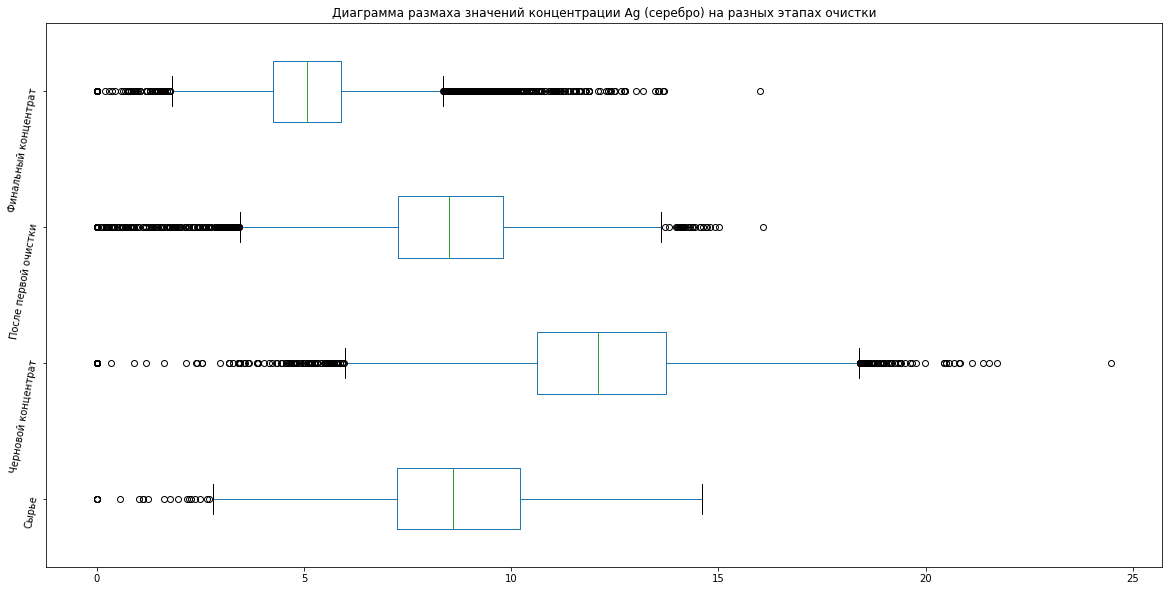

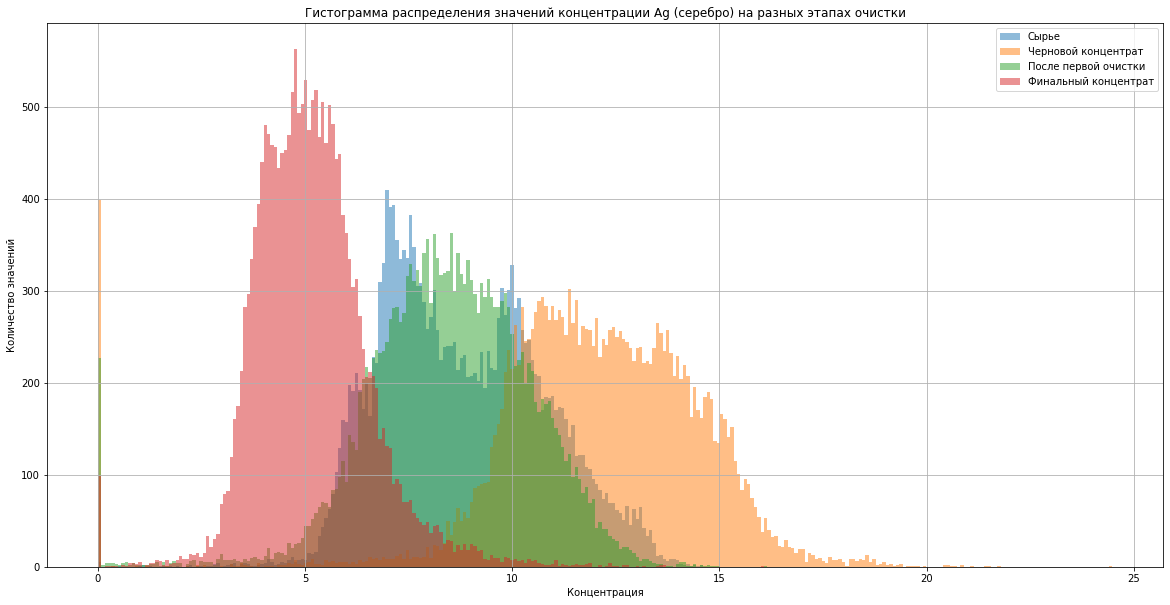

In [26]:
hist_fun_1 (data[raw_list_ag], 'Ag (серебро)')

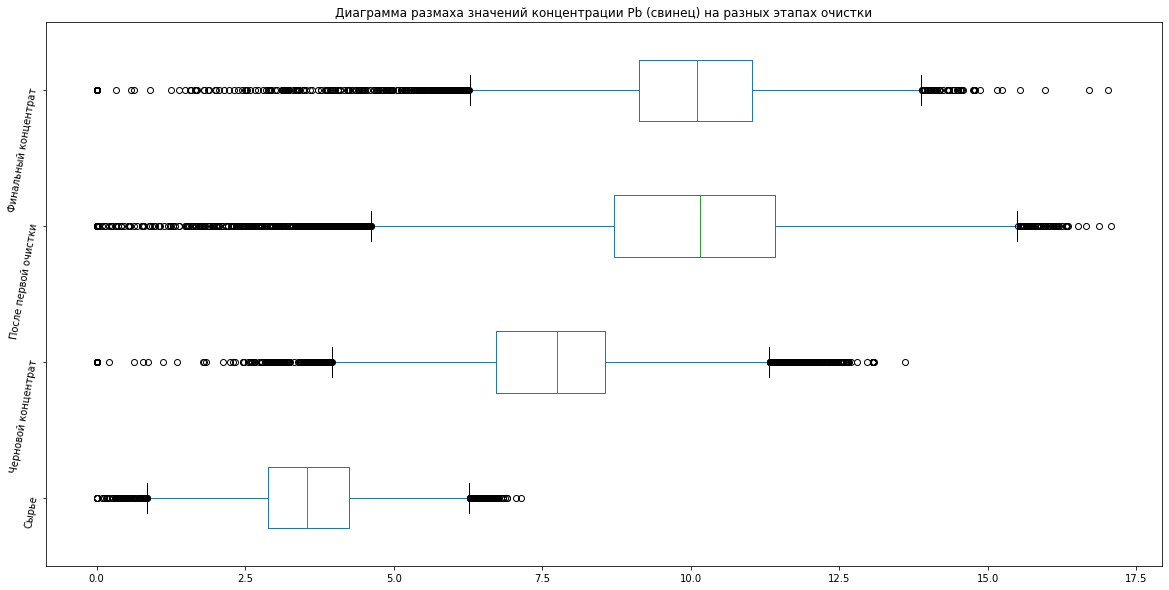

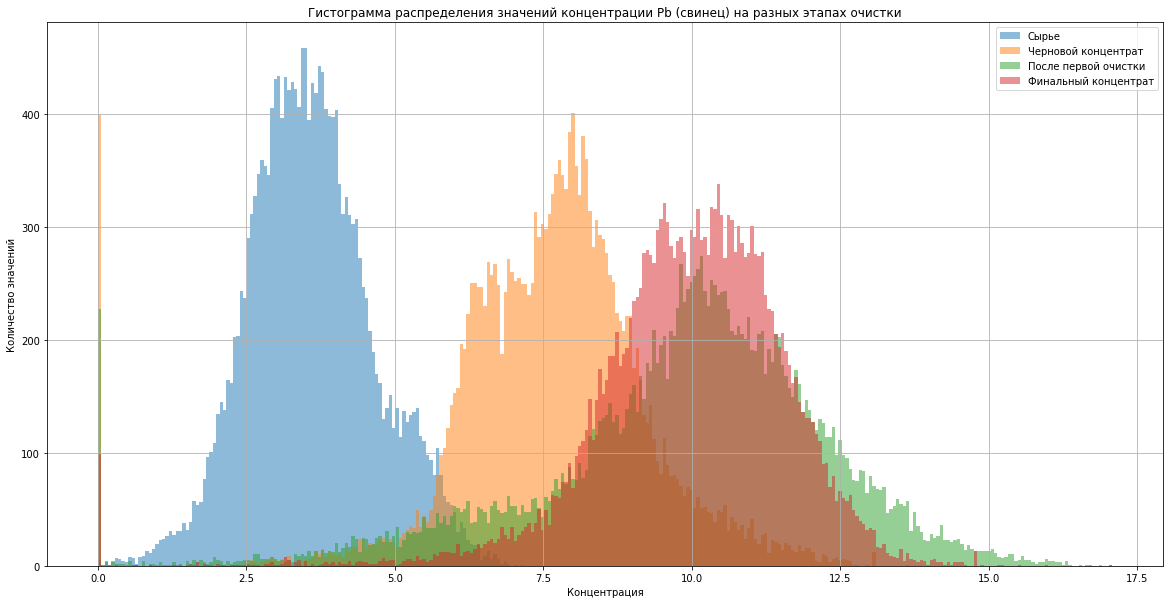

In [27]:
hist_fun_1 (data[raw_list_pb], 'Pb (свинец)')

Вывод: Концентрация золота с каждым этапом очистки увеличивается. Концентрация серебра по отношению к начальному значению уменьшается, а свинца увеличивается.

### Сравним размер гранул в исходном сырье на обучающей и тестовой выборках.

In [28]:
data_train['rougher.input.feed_size'].describe()

count    14295.000000
mean        59.000648
std         22.445442
min          0.049194
25%         47.347409
50%         54.476700
75%         64.455810
max        484.967466
Name: rougher.input.feed_size, dtype: float64

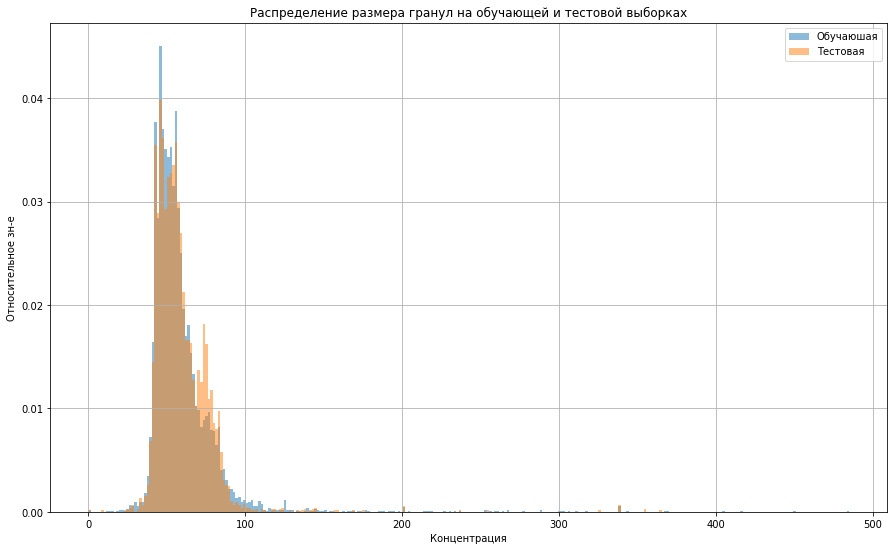

In [29]:
content = pd.DataFrame()
content ['Обучаюшая'] = data_train['rougher.input.feed_size']
content ['Тестовая'] = data_test['rougher.input.feed_size']
content.plot(kind='hist',
             title='Распределение размера гранул на обучающей и тестовой выборках',
             figsize=(15,9),
             bins=300,
             grid=True,
             density=True,
             alpha=0.5);
plt.xlabel('Концентрация')
plt.ylabel("Относительное зн-е");
plt.show()

В целом распределения похожи несмотря на то, что есть сильные выбросы.

### Исследуем суммарную концентрацию металлов на разных стадиях.

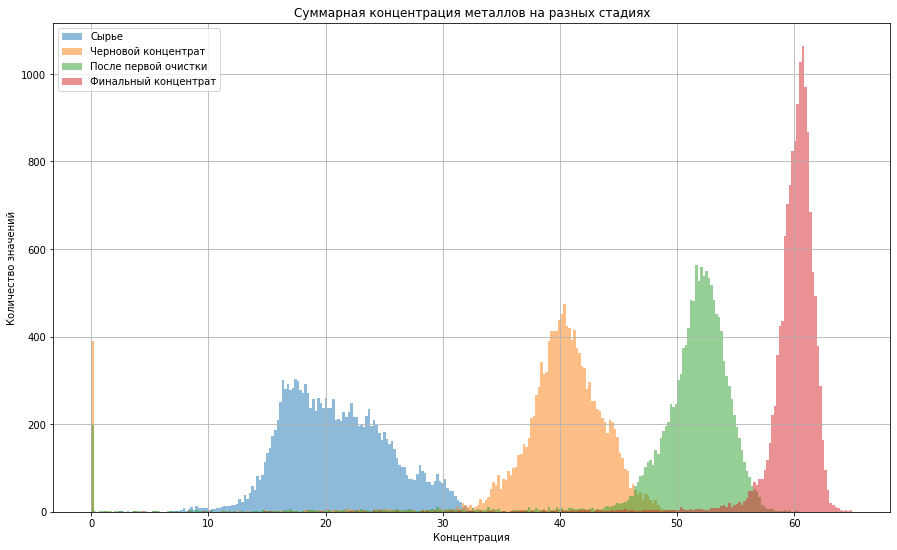

In [30]:
content = pd.DataFrame()
for i in range(4):
    content [stage[i]] = data_train[stage_columns[i]].sum(axis=1)
content.plot(kind='hist',
             title='Cуммарная концентрация металлов на разных стадиях',
             figsize=(15,9),
             bins=300,
             grid=True,
             alpha=0.5);
plt.xlabel('Концентрация')
plt.ylabel("Количество значений");
plt.show()


Суммарная концентрация металлов с каждым этапом увеличивается, а отклонение уменьшается.

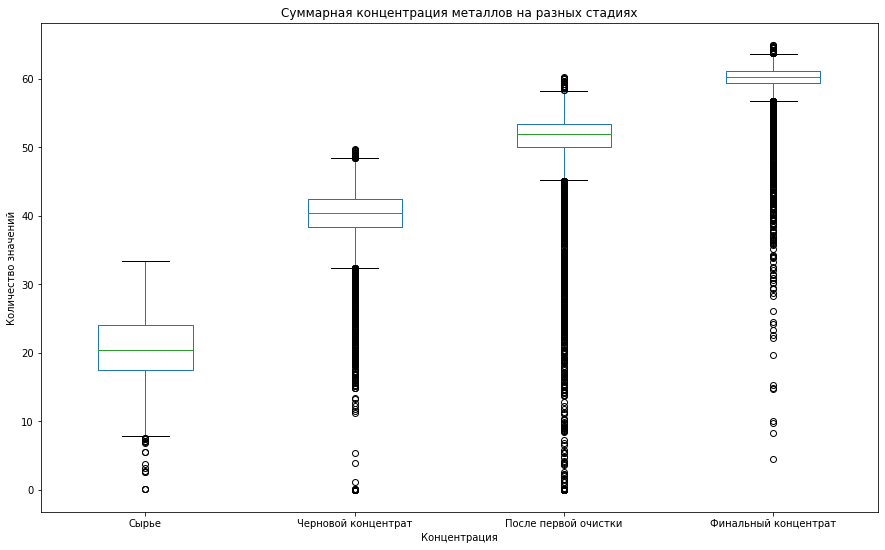

In [31]:
content.plot(kind='box',
             title='Cуммарная концентрация металлов на разных стадиях',
             figsize=(15,9));
plt.xlabel('Концентрация')
plt.ylabel("Количество значений");
plt.show()

Проверим наличие нулевых значений концентрации и удалим их на всех этапах.

In [32]:
list_index = set([])
list_index_zero = set([])
for i in range(4):
    list_index_zero = list_index_zero | set((data_train[data_train[stage_columns[i]].sum(axis=1) == 0]).index)
print('Количество строк с нулевыми значениями: ',len(list_index_zero))

Количество строк с нулевыми значениями:  486


Удалим соответствующие строки.

In [33]:
data_train.drop(index=list(list_index_zero), inplace=True)

Изучив суммарную концентрацию металлов на разных этапах, были обнаружены нулевые значения и отброшены.

## Модель

Для решения задачи введём новую метрику качества — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).

In [34]:
def smape (target, predict):
    smape = (abs(target - predict)/(abs(target) + abs(predict))*2*100).mean()
    return smape

smape_score = make_scorer(smape)

In [35]:
def total_smape (rougher_smape, final_smape):
    return 0.25*rougher_smape + 0.75*final_smape

Для обучения моделей используем только те признаки в обучающей выборке, которые представлены в тестовой.<br>
Целевые переменные у нас будут rougher.output.recovery и final.output.recovery.
Колонка date нам не потребуется. поэтому использовать ее не будем.

In [36]:
# параметр date не нужен
features_test = data_test.drop(columns='date')

# берем список параметров из тестовой
features_train = data_train[features_test.columns] 

target_train = data_train[['rougher.output.recovery', 
                           'final.output.recovery']]
target_train.columns = ['rougher', 'final']

# target извлечем из общего датасета
target_test = data_test.merge(data[['date',
                                    'rougher.output.recovery', 
                                    'final.output.recovery']], 
                              on="date")[['rougher.output.recovery',
                                          'final.output.recovery']]
target_test.columns = ['rougher', 'final']
                        
scaler = MinMaxScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

### Модель линейной регрессии

Обучим модель и оценим их качество кросс-валидацией

In [37]:
%time
model_line = LinearRegression()

score_rougher = cross_val_score(model_line, 
                                features_train, 
                                target_train['rougher'], 
                                cv=5, 
                                scoring=smape_score).mean()
score_final = cross_val_score(model_line, 
                              features_train, 
                              target_train['final'], 
                              cv=5, 
                              scoring=smape_score).mean()

smape_line = total_smape (score_rougher, score_final)
print(f'* sMAPE: {smape_line}') 

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs
* sMAPE: 8.728913557994726


### Модель дерева решений

In [38]:
%%time
best_score = 11
bad_score = 0
#for depth in range(2,40,4):
for depth in range(2,20,2):
    model_tree = DecisionTreeRegressor(max_depth=depth,
                                       random_state=STATE)
    score_rougher = cross_val_score(model_tree, 
                                    features_train, 
                                    target_train['rougher'], 
                                    cv=5, 
                                    scoring=smape_score).mean()
    score_final = cross_val_score(model_tree, 
                                  features_train, 
                                  target_train['final'], 
                                  cv=5, 
                                  scoring=smape_score).mean()
    smape_tree = total_smape (score_rougher, score_final)
    if best_score > smape_tree:
        best_score = smape_tree
        message = '** sMAPE: ' + str(best_score) + ' (max_depth: ' + str(depth) +') **'
print(message)        

** sMAPE: 8.393778583960462 (max_depth: 2) **
CPU times: user 44.1 s, sys: 130 ms, total: 44.2 s
Wall time: 44.4 s


### Модель случайного леса

In [39]:
%%time 
best_score = 100 #цикл работает около 5 минут
for est in range(2, 40, 10):
    for depth in range(2,8,2):
        model_forest = RandomForestRegressor(random_state=STATE,
                                             n_estimators=est, 
                                             max_depth=depth)
        score_rougher = cross_val_score(model_forest, 
                                        features_train, 
                                        target_train['rougher'], 
                                        cv=5, 
                                        scoring=smape_score, 
                                        n_jobs = -1).mean()
        score_final = cross_val_score(model_forest, 
                                      features_train, 
                                      target_train['final'], 
                                      cv=5, 
                                      scoring=smape_score, 
                                      n_jobs = -1).mean()
        smape_forest = total_smape (score_rougher, score_final)
        if best_score > smape_forest:
            best_score = smape_forest
            message = '** sMAPE: ' + str(best_score) + ' (max_depth: ' + \
str(depth) + ', n_estimators: ' + str(est) +') **'
print(message)

** sMAPE: 8.18897621232637 (max_depth: 2, n_estimators: 12) **
CPU times: user 4min 54s, sys: 303 ms, total: 4min 55s
Wall time: 4min 56s


Итого: лучший результат показала модель случайного леса с результатом sMape = 8.19 (n_estimators = 32, max_depth = 4)

### Проверка модели на тестовой выборке

In [40]:
model_forest_rougher = RandomForestRegressor(random_state=STATE,
                                             n_estimators=32, 
                                             max_depth=4)
model_forest_final = RandomForestRegressor(random_state=STATE,
                                           n_estimators=32, 
                                           max_depth=4)
model_forest_rougher.fit(features_train, target_train['rougher'])
model_forest_final.fit(features_train, target_train['final'])

predicted_rougher = model_forest_rougher.predict(features_test)
predicted_final = model_forest_final.predict(features_test)

smape_rougher = smape(target_test['rougher'], predicted_rougher)
smape_final = smape(target_test['final'], predicted_final)
print('Показатель sMAPE на тестовой выборке: ', total_smape (smape_rougher, smape_final))


Показатель sMAPE на тестовой выборке:  6.717605342030899


### Проверка модели на адекватность, используя константную.

In [41]:
dummy_rougher = DummyRegressor()
dummy_final = DummyRegressor()
dummy_rougher.fit(features_train, target_train['rougher'])
dummy_final.fit(features_train, target_train['final'])

predicted_rougher = dummy_rougher.predict(features_test)
predicted_final = dummy_final.predict(features_test)

smape_rougher = smape(target_test['rougher'], predicted_rougher)
smape_final = smape(target_test['final'], predicted_final)
print('Показатель sMAPE константной модели: ', total_smape (smape_rougher, smape_final))

Показатель sMAPE константной модели:  8.458535867248395


Выбранная модель случайного леса прошла проверку на адекватность.

## ИТОГОВЫЙ ВЫВОД:

    По заказу компании "Цифры" требовалось создать модель машинного обучения для предсказания ккоэффициента восстановления золота из золотосодержащей руды. Были предоставлены данные с многочисленными параметрами очистки. В исходных таблицах было достаточно много пропусков. Было известно, что соседние по времени параметры похожи, что позволило восстановить данные. Также были обнаружены аномальные значения (концентрация золота после очистки была меньше изначальной или воообще нулевая), которые были отброшены. Была проведена визуализация изменения концентрации металлов на разных этапах очистки, а также сравнение данных на обучающй и тестовой выборках. Для обучения было выбрано 3 модели и выбрана самая эффективная, а затем протестирована. Проверку выбранная модель прошла.